# MNIST(Modified National Institute of Standards and Technology)

In [12]:
from sklearn.datasets import  fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [13]:
mnist=fetch_openml('mnist_784',version=1)

In [14]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
mnist.values()

dict_values([       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10

In [17]:
X,y=mnist["data"],mnist["target"] #X contains train the model and y contains predict the label

In [18]:
X.shape

(70000, 784)

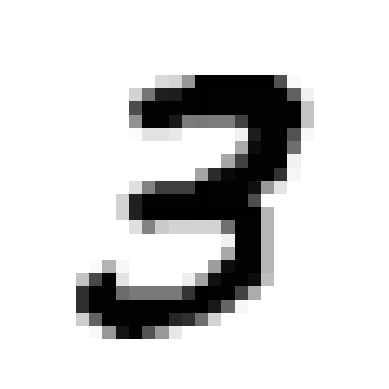

In [42]:
some_digit = X.iloc[7].values #accesses the first row of the DataFrame X. iloc[] is used for integer-location based indexing in pandas.
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [43]:
y[7]

3

In [44]:
y=y.astype(np.uint8) # "unsigned 8-bit integer". It is a data type in numpy that can hold integer values from 0 to 255 (since it is an 8-bit integer, and unsigned means no negative values).

In [45]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

# Training a Binary Classifier

In [47]:
y_train_3=(y_train==3) # True for all 9s  false for all other digits

In [48]:
y_test_3=(y_test==3)

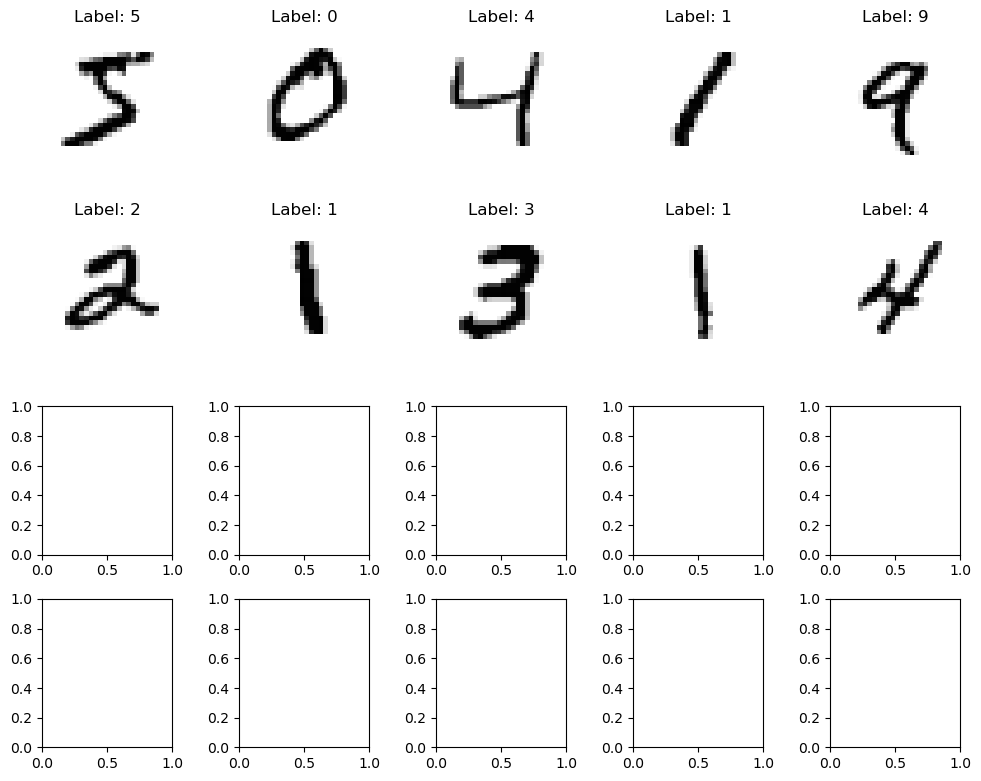

In [39]:

# Number of images you want to display
num_images = 10

# Set up a grid of subplots (in this case, 2 rows and 5 columns for 10 images)
#fig, axes = plt.subplots(3, 10, figsize=(10, 5))
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4 rows and 5 columns for 20 images


# Flatten the axes to easily iterate over them
axes = axes.flatten()

# Loop through the first `num_images` and plot them
for i in range(num_images):
    image = X_train.iloc[i].values  # Get the image as a numpy array
    label = y_train.iloc[i]  # Get the corresponding label
    
    # Reshape the image to 28x28 and display it
    axes[i].imshow(image.reshape(28, 28), cmap="binary")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")  # Hide the axis for cleaner view

# Adjust layout for better spacing between images
plt.tight_layout()
plt.show()


# Stochastic Gradient Descent Classifier (SGD

1. This classifier has  the advantage of being capable of handling very large data sets effciently.
2. SGD deals training instances independently one at a time which also makes SGD well suited for online learning.

   Tip:The SGDClassifier relies randomness during the  training (henece the name "stochastic"). If you want to reproducible results ,you should set the random_state parameter
        
   


In [49]:
from sklearn .linear_model import SGDClassifier
import warnings

In [50]:
# Assume X_train and y_train_5 are already defined and preprocessed
# Define a single classifier
sgdc_clf = SGDClassifier(random_state=42)

# Train the classifier
sgdc_clf.fit(X_train, y_train_3)

# Predict while ignoring warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress warnings about feature names
    prediction = sgdc_clf.predict([some_digit])

print("Prediction:", prediction)


Prediction: [False]


In [6]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Creating the datasets
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])  
Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),  #Normalizes the input data by subtracting the mean and dividing by the standard deviation, making features comparable in scale.
                    SGDClassifier(max_iter=1000, tol=1e-3)) #rains a linear classifier using Stochastic Gradient Descent
clf.fit(X, Y) 
print(clf.predict([[-0.8, -1]]))

[1]
